Unsupervised Anomaly Detection of Multivariate Medical Sensor Data
==================================================================
- This jupyter notebook has been compiled to demonstrate the pipeline used in the title project - see the report for further detail.
- It allows for the demonstration of the system with the current selected settings but also allows for changes to be made to the *CONSTANTS* and for the notebook to then be rerun.

In [1]:
# Import required libraries
import autoreload

In [2]:
# Reload user-defined modules when changes have been made to them
%load_ext autoreload
%autoreload 2

In [3]:
# Set file directory and path constants
FILE_DIR = '../patient-simulator-FYP/'

DIAGRAM_DIR = FILE_DIR + 'diagrams/'
DATA_DIR = FILE_DIR + 'datasets/'


PATIENT_DIR = DATA_DIR + 'patient/'
CONTROL_DIR = DATA_DIR + 'control/'

### * CONSTANTS *

In [4]:
# Set the constants to be true or false depending on the purpose
PLOT_ON = True             # plots will or will not be displayed
DIAGRAM_SAVE_ON = False     # plots will or will not be saved

Part 1. Data Collection
=======================
### Patient Data

In [5]:
# Import user-defined modules
from patient_data import *
from control_data import *

In [6]:
# Extracting the data from the .csv file provided at the outset of the project
PATIENT_DATA_FILENAME = 'DE250053 - (Callibrated - new method - compressed).csv'
patient_original_df = data_extractor(PATIENT_DIR, PATIENT_DATA_FILENAME)
patient_original_df.head()

,Milliseconds,Backrest Load Cell Force / N,Backrest Angle / Deg,Left Hip Load Cell Force / N,Right Hip Load Cell Force / N,Left Hip Angle / Deg,Right Hip Angle / Deg,Left Knee Angle / Deg,Date,Time
0,0.00,-133.0,10.0,-152.0,-201.0,18.6,5.33,33.6,12/01/2011,11:04:05
1,0.05,-139.0,10.3,-158.0,-186.0,18.5,4.25,34.5,12/01/2011,11:04:05
2,0.10,-151.0,10.6,-153.0,-168.0,18.4,4.25,35.6,12/01/2011,11:04:05
3,0.15,-166.0,11.0,-145.0,-151.0,18.2,4.30,36.5,12/01/2011,11:04:05
4,0.20,-173.0,11.4,-134.0,-139.0,17.8,4.25,37.0,12/01/2011,11:04:05


In [7]:
# Extracting just the backrest, left and right hip angles from the provided patient data
patient_angles_df = data_filterer(patient_original_df)
patient_angles_df.head()

,back_angle,left_angle,right_angle,Date
0,10.0,18.6,5.33,2011-12-01 11:04:05
1,10.3,18.5,4.25,2011-12-01 11:04:05
2,10.6,18.4,4.25,2011-12-01 11:04:05
3,11.0,18.2,4.30,2011-12-01 11:04:05
4,11.4,17.8,4.25,2011-12-01 11:04:05


### Control Data

In [8]:
# Extracting the 3D vector data from the .txt files for each of the actions and subjects
control_coord_df = txt_extract_and_filter(CONTROL_DIR)
control_coord_df.head()

coords_data.csv created already, delete file if new version required


,action,subject,frame_no,neck,bt_spine,tp_pelvis,lf_pelvis,lf_knee,rh_pelvis,rh_knee
0,01,01,1,"[-0.0129654, -0.0104405, 2.36461]","[-0.0262787, -0.286294, 2.37592]","[-0.020558, -0.33809, 2.34418]","[-0.0969795, -0.408051, 2.3199]","[-0.182758, -0.538522, 2.00263]","[0.0528911, -0.419568, 2.35385]","[0.176717, -0.508167, 2.05601]"
1,01,01,2,"[-0.012914, -0.0104423, 2.36465]","[-0.0262508, -0.286282, 2.37596]","[-0.020526, -0.338069, 2.3442]","[-0.0969689, -0.408026, 2.3199]","[-0.18275, -0.538512, 2.00265]","[0.0529207, -0.419556, 2.35386]","[0.176776, -0.508069, 2.05601]"
2,01,01,3,"[-0.0128641, -0.0104459, 2.36468]","[-0.026225, -0.286269, 2.376]","[-0.0204959, -0.338048, 2.34421]","[-0.09696, -0.408001, 2.31991]","[-0.182746, -0.538504, 2.00266]","[0.0529493, -0.419543, 2.35388]","[0.176826, -0.507976, 2.05602]"
3,01,01,4,"[-0.0128186, -0.0104498, 2.36472]","[-0.026204, -0.286257, 2.37604]","[-0.0204715, -0.338028, 2.34423]","[-0.0969558, -0.40798, 2.31991]","[-0.182742, -0.538496, 2.00267]","[0.0529725, -0.419531, 2.35389]","[0.176871, -0.507892, 2.05603]"
4,01,01,5,"[-0.0127735, -0.0104501, 2.36475]","[-0.0261839, -0.286245, 2.37607]","[-0.020448, -0.338008, 2.34424]","[-0.0969515, -0.407957, 2.3199]","[-0.182733, -0.538488, 2.0027]","[0.0529949, -0.419518, 2.3539]","[0.176911, -0.507812, 2.05603]"


In [9]:
# Subtracting sets of the 6 vectors provides 3 limb vectors which by using the dot product rule can provide comparative angles for backrest, left and right hip angles
control_angles_df = coords_to_angles(CONTROL_DIR)
control_angles_df.head()

,action,subject,frame_no,back_angle,left_angle,right_angle
0,1,1,1,34.775726,51.575015,68.611671
1,1,1,2,34.797727,51.564526,68.614773
2,1,1,3,34.829046,51.565308,68.628192
3,1,1,4,34.850472,51.555879,68.629540
4,1,1,5,34.871882,51.544614,68.636610


Part 2. Data Exploration
========================
### Patient Data

In [10]:
# Display the provided angle data
patient_orig_angles_df = datetime_converter(patient_angles_df)
if PLOT_ON:
    plot_patient_orig_data(patient_orig_angles_df, DIAGRAM_DIR, save_new=DIAGRAM_SAVE_ON)
patient_orig_angles_df.shape

(64188, 4)

In [11]:
# Remove the period of the data that contains the backrest lock
remove_start = 25000
remove_end = 51000
keep_backlock = False

patient_no_lock_df = backlock_remover(patient_angles_df, remove_start, remove_end, keep_backlock)
patient_no_lock_df = datetime_converter(patient_no_lock_df)
patient_no_lock_df.shape

(38187, 4)

In [12]:
# Display the provided angle data with the backrest lock removed
if PLOT_ON:
    plot_backlock_removed_data(patient_no_lock_df, DIAGRAM_DIR, save_new=DIAGRAM_SAVE_ON)

In [13]:
# Use the pandas describe function to give a overview of the data
patient_no_lock_df.describe()

,back_angle,left_angle,right_angle
count,38187.000000,38187.000000,38187.000000
mean,9.297321,15.853373,24.712376
std,2.158881,4.295489,15.710972
min,6.020000,3.730000,-10.200000
25%,7.490000,12.300000,10.500000
50%,9.050000,16.000000,24.100000
75%,11.100000,19.400000,40.000000
max,15.400000,29.700000,61.900000


### Control Data

In [14]:
# Resample the control data from MS Kinect 30Hz to be the same as the 20Hz patient data
control_resamp_angles_df = resampler(control_angles_df, 30, 20)
control_resamp_angles_df.shape

(14222, 6)

In [15]:
# Plot the different actions for the control dataset
if PLOT_ON:
    plot_control_actions(control_resamp_angles_df, DIAGRAM_DIR, save_new=DIAGRAM_SAVE_ON)

In [16]:
# Use the pandas describe function to give a overview of the data
control_resamp_angles_df.describe()

,back_angle,left_angle,right_angle
count,14222.000000,14222.000000,14222.000000
mean,32.096763,66.308188,65.784556
std,18.718297,18.507260,20.745979
min,-0.295553,2.338146,2.248692
25%,11.565802,52.391768,50.836504
50%,40.727614,66.439698,66.332489
75%,45.316735,78.284798,80.635848
max,100.667154,178.473911,162.708799


Part 3. Data Pre-processing
===========================
## 3.1 Normalising
### Patient Data

In [17]:
# Normalise the patient dataset
patient_norm_df = patient_normaliser(patient_no_lock_df)
patient_norm_df.head()

,back_angle,left_angle,right_angle,datetime
0,0.424307,0.572584,0.215395,2011-12-01 11:04:05.000
1,0.456290,0.568733,0.200416,2011-12-01 11:04:05.050
2,0.488273,0.564883,0.200416,2011-12-01 11:04:05.100
3,0.530917,0.557181,0.201110,2011-12-01 11:04:05.150
4,0.573561,0.541779,0.200416,2011-12-01 11:04:05.200


In [18]:
# Display the normalised patient data with overlayed regions of interest
if PLOT_ON:
    suggested_anom = True
    plot_patient_norm_data(patient_norm_df, suggested_anom, DIAGRAM_DIR, save_new=DIAGRAM_SAVE_ON)

In [19]:
# Save pre-processed patient data
save_proc_patient_df(patient_norm_df, PATIENT_DIR, keep_backlock)

patient_data.csv created already, delete file if new version required


### Control Data

In [20]:
# Normalise the control dataset
control_norm_df = control_normaliser(control_resamp_angles_df)
control_norm_df.head()

,action,subject,frame,back_angle,left_angle,right_angle
0,1,1,1,0.309028,0.052406,0.991990
1,1,1,2,0.212165,0.023802,0.993044
2,1,1,3,0.251407,0.033033,0.993763
3,1,1,4,0.232627,0.025384,0.994412
4,1,1,5,0.251839,0.028918,0.995454


In [21]:
# Display the entire normalised control data
if PLOT_ON:
    plot_control_norm_data(control_norm_df, DIAGRAM_DIR, save_new=DIAGRAM_SAVE_ON)

In [22]:
# Save pre-processed control data
save_proc_control_df(control_norm_df, CONTROL_DIR)

control_data.csv created already, delete file if new version required


## 3.2 Window Sequencing
### Patient and Control Data

In [23]:
# Import the author-defined utils module
from utils import *

### * CONSTANTS *

In [24]:
# Set constants that can be varied
WINDOW_SIZE = 20            # 20 or 100 are prebuilt and can be loaded in, others will have to be trained manually 
TRAIN_DATA = 'control'      # either 'patient', 'augment' or 'control'   

In [25]:
# Split train and test data according to chosen training data type
if TRAIN_DATA == 'patient':
    split = int(patient_norm_df.shape[0] * 0.8)
elif TRAIN_DATA == 'augment':
    split = int(patient_norm_df.shape[0] * 0.4)
elif TRAIN_DATA == 'control':
    split = 0

patient_train = patient_norm_df.iloc[:split, :]
patient_test = patient_norm_df.iloc[split:, :]

In [26]:
# Convert the split patient data into window sequences
SENSORS = ['back_angle', 'left_angle', 'right_angle']
patient_seq_train = to_sequences(patient_train[SENSORS], WINDOW_SIZE)
patient_seq_test = to_sequences(patient_test[SENSORS], WINDOW_SIZE)

print(f'Number of patient samples in training set: {patient_seq_train.shape}')
print(f'Number of patient samples in testing set: {patient_seq_test.shape}')

Number of patient samples in training set: (0,)
Number of patient samples in testing set: (38167, 20, 3)


In [27]:
# Convert the control data into window sequences
if TRAIN_DATA == 'augment' or TRAIN_DATA == 'control':
    # Loop through each action and subject
    action_nos = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14]
    subject_nos = list(range(1,11))
    extract_data = []
    # Loop through each action and subject
    for action in action_nos:
        for subject in subject_nos:
            # Convert the samples to windows
            sample = control_norm_df.loc[(control_norm_df['action'] == action) & (control_norm_df['subject'] == subject), SENSORS]
            control_samples = to_sequences(sample, WINDOW_SIZE)
            extract_data.extend(control_samples)
    control_seq_train = np.array(extract_data)
    print(f'Number of control samples in training set: {control_seq_train.shape}')

Number of control samples in training set: (12022, 20, 3)


In [28]:
# Combine the data to according to the chosen training/testing configuration
if TRAIN_DATA == 'patient':
    train_seqs = np.copy(patient_seq_train)
    test_seqs = np.copy(patient_seq_test)
elif TRAIN_DATA == 'augment':
    train_seqs = np.append(patient_seq_train, control_seq_train, axis=0)
    test_seqs = np.copy(patient_seq_test)
elif TRAIN_DATA == 'control':
    train_seqs = np.copy(control_seq_train)
    test_seqs = np.copy(patient_seq_test)

print(f'Number of training samples: {train_seqs.shape}')
print(f'Number of testing samples: {test_seqs.shape}')

Number of training samples: (12022, 20, 3)
Number of testing samples: (38167, 20, 3)


Part 4. Model Selection & Training
==================================
Available models that are saved to immediately load in rather than having to train.

| Window Size 	| Train Data 	| First Layer 	| Second Layer 	|
|-------------	|------------	|-------------	|--------------	|
| 20          	| 'patient'  	| 0.25        	| None         	|
| 20          	| 'augment'  	| 0.25        	| None         	|
| 20          	| 'control'  	| 0.25        	| None         	|
| 100         	| 'patient'  	| 0.25        	| None         	|
| 100         	| 'augment'  	| 0.25        	| None         	|
| 100         	| 'control'  	| 0.25        	| None         	|

### * CONSTANTS *

In [29]:
COMPRESS_PER_LAYER = [0.25, None]       # Each of the elements in the list can be a number from 0 to 1

In [30]:
# Set up naming convention which will be used to save the model
ID = f'ws{WINDOW_SIZE}_{TRAIN_DATA}_1L{COMPRESS_PER_LAYER[0]}_2L{COMPRESS_PER_LAYER[1]}'
ID

'ws20_control_1L0.25_2LNone'

In [31]:
# Calculate the number of units in each layer based on the compression factor
units_per_layer = []
for c in COMPRESS_PER_LAYER:
    if c is None:
        units_per_layer.append(None)
    else:
        units_per_layer.append(int(train_seqs.shape[1] * train_seqs.shape[2] * c))
units_per_layer

[15, None]

In [32]:
# Import the author-defined LSTM Autoencoder Class
from autoencoder import LSTMAutoencoder

In [33]:
# Set the model directory and name
MODEL_DIR = FILE_DIR + 'models/'
model_file = f'{MODEL_DIR}{ID}-LSTM-AE.h5'
patience = 3

# If the file exists, load it in
# If it does not exist, train a new one
model = LSTMAutoencoder(
    units_per_layer[0],
    units_per_layer[1],
    train_seqs,
    patience,
    model_file,
    DIAGRAM_DIR
    )

Checking for ../patient-simulator-FYP/models/ws20_control_1L0.25_2LNone-LSTM-AE.h5

Model loaded from: ../patient-simulator-FYP/models/ws20_control_1L0.25_2LNone-LSTM-AE.h5
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 15)                1140      
_________________________________________________________________
dropout_22 (Dropout)         (None, 15)                0         
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 20, 15)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
dropout_23 (Dropout)         (None, 20, 15)            0         
_________________________________________________________________
time_distrib

In [34]:
# Reconstruct test signal
recon_test_seqs = model.model.predict(test_seqs)
recon_test_seqs.shape

(38167, 20, 3)

Part 5. Error Calculation
=========================

In [35]:
# Choose which error types to compute
error_types = ['MAE', 'Area']#, 'DTW']

In [36]:
# Combine error and anomaly dfs
errors = []
dfs = []

# Compute each of the reconstruction errors
for error_type in error_types:

    error = error_computation(test_seqs, recon_test_seqs, error_type)
    error_df = anomaly_df(patient_test, WINDOW_SIZE, error, 0)
    errors.append(error)
    dfs.append(error_df)

In [37]:
# Display the error distribution for the different errors calculated
if PLOT_ON:
    _, diagram = multiple_error_hist_plot_and_save(
        errors, 
        error_types, 
        f'W={WINDOW_SIZE}, Train={TRAIN_DATA}', 
        DIAGRAM_DIR, 
        save_new=DIAGRAM_SAVE_ON
        )

In [38]:
# Display the anomaly scores for the different errors calculated
if PLOT_ON:
    multiple_error_plot_and_save(
        dfs, 
        error_types, 
        f'W={WINDOW_SIZE}, Train={TRAIN_DATA}', 
        DIAGRAM_DIR, 
        save_new=DIAGRAM_SAVE_ON
        )

Part 6. Thresholding
====================
### Fixed - based off of MAX of Test Error

### * CONSTANTS *

In [39]:
# Set the constants
FIXED_THRESHOLD_PCT = 0.75      # Set the percentage of the max error
error_types = ['MAE', 'Area']   # Set the 

In [40]:
# Set the origin of error thats maximum is used to set the threshold
FIXED_THRESHOLD_ORG = 'Test' 

In [41]:
# Reconstruct test signal
test_recon_seqs = model.model.predict(test_seqs)

In [42]:
# Compute the test errors, corresponding thresholds and anomaly dataframes
test_MAE = error_computation(test_seqs, test_recon_seqs, error_types[0])
test_MAE_thresh = fixed_thresh(FIXED_THRESHOLD_PCT, test_MAE, len(patient_test[WINDOW_SIZE:]))
test_MAE_df = anomaly_df(patient_test, WINDOW_SIZE, test_MAE, test_MAE_thresh)

test_area_error = error_computation(test_seqs, test_recon_seqs, error_types[1])
test_area_thresh = fixed_thresh(FIXED_THRESHOLD_PCT, test_area_error, len(patient_test[WINDOW_SIZE:]))
test_area_df = anomaly_df(patient_test, WINDOW_SIZE, test_area_error, test_area_thresh)

test_errors = [test_MAE, test_area_error]
test_anomaly_dfs = [test_MAE_df, test_area_df]

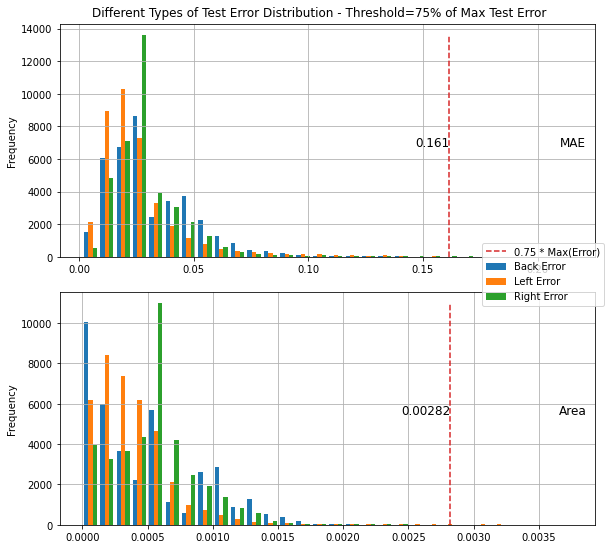

In [43]:
# Display the test error distribution for the different errors along with the imposed fixed threshold 
test_thresholds, _ = multiple_error_hist_plot_and_save(
    test_errors, 
    error_types, 
    f'Threshold={int(FIXED_THRESHOLD_PCT*100)}% of Max {FIXED_THRESHOLD_ORG} Error', 
    DIAGRAM_DIR, 
    traintest='Test', 
    pct=FIXED_THRESHOLD_PCT,
    save_new=DIAGRAM_SAVE_ON
    )

In [44]:
# Display the anomaly scores for the different errors calculated along with the imposed fixed threshold
if PLOT_ON:
    multiple_error_plot_and_save(
    test_anomaly_dfs, 
    error_types, 
    f'W={WINDOW_SIZE}, Train={TRAIN_DATA}',
    DIAGRAM_DIR, 
    thresholds=test_thresholds, 
    save_new=DIAGRAM_SAVE_ON
    )

### Fixed - based off of MAX of Train Error

In [45]:
# Set the origin of error thats maximum is used to set the threshold
FIXED_THRESHOLD_ORG = 'Train'  

In [46]:
# Reconstruct test signal
train_recon_seqs = model.model.predict(train_seqs)

In [47]:
# Compute each of the reconstruction errors
train_MAE = error_computation(train_seqs, train_recon_seqs, error_types[0])
train_area_error = error_computation(train_seqs, train_recon_seqs, error_types[1])

train_errors = [train_MAE, train_area_error]

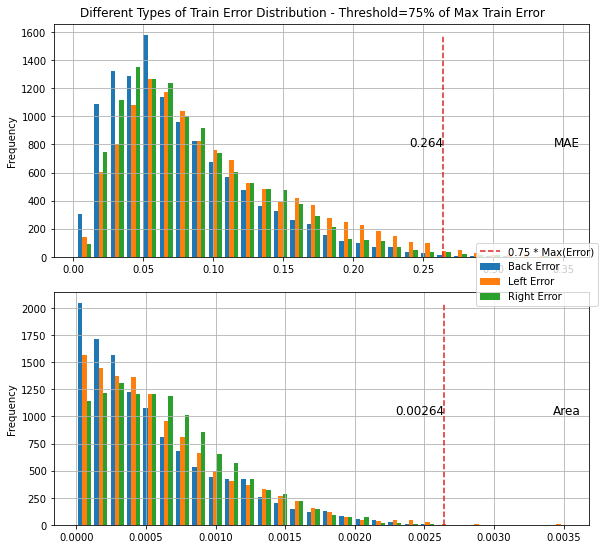

In [48]:
# Display the train error distribution for the different errors along with the imposed fixed threshold 
train_thresholds, _ = multiple_error_hist_plot_and_save(
    train_errors, 
    error_types, 
    f'Threshold={int(FIXED_THRESHOLD_PCT*100)}% of Max {FIXED_THRESHOLD_ORG} Error', 
    DIAGRAM_DIR, 
    traintest=FIXED_THRESHOLD_ORG, 
    pct=FIXED_THRESHOLD_PCT,
    save_new=DIAGRAM_SAVE_ON
    )

In [49]:
# Compute the anomaly dfs for the different the train
train_MAE_df = anomaly_df(patient_test, WINDOW_SIZE, test_MAE, train_thresholds[0])
train_area_df = anomaly_df(patient_test, WINDOW_SIZE, test_area_error, train_thresholds[1])
train_anomaly_dfs = [train_MAE_df, train_area_df]

In [50]:
# Display the anomaly scores for the different errors calculated along with the imposed fixed threshold
if PLOT_ON:
    multiple_error_plot_and_save(
    dfs, 
    error_types, 
    f'W={WINDOW_SIZE}, Train={TRAIN_DATA}', 
    DIAGRAM_DIR, 
    thresholds=train_thresholds, 
    save_new=DIAGRAM_SAVE_ON
    )

### Adaptive Threshold

In [51]:
# Compute the moving thresholds and corresponding anomalies
adaptive_anomaly_dfs, anomalies_dfs = moving_thresholds(test_anomaly_dfs)

In [52]:
# Display the anomaly scores for the different errors calculated along with the imposed moving threshold
if PLOT_ON:
    multiple_error_moving_thresh_plot_and_save(
    adaptive_anomaly_dfs, 
    error_types, 
    f'Locally Adaptive Threshold', 
    DIAGRAM_DIR, 
    save_new=DIAGRAM_SAVE_ON
    )

### Adaptive Threshold with Anomaly Pruning

In [ ]:
 # Prune the computed moving thresholds and corresponding anomalies
 theta = 0.1
 pruned_anomaly_dfs = anomaly_pruning(adaptive_anomaly_dfs, theta)

In [ ]:
# Display the anomaly scores for the different errors calculated along with the imposed fixed threshold and anomaly pruning
if PLOT_ON:
    multiple_error_moving_thresh_plot_and_save(
    pruned_anomaly_dfs, 
    error_types, 
    f'Locally Adaptive Threshold - Pruned with Theta={theta}', 
    DIAGRAM_DIR, 
    pruned=True, 
    save_new=DIAGRAM_SAVE_ON
    )

Part 7. Anomaly Detection
====================

In [ ]:
# Plot the detected anomalies for each of the different attempted variations
error_calc_choice = [0, 1]
for err in error_calc_choice:
    methods = ['Fixed Test Error PCT', 'Fixed Train Error PCT', 'Adaptive Test', 'Adaptive Test - Pruned']
    all_anomalies_dfs = [test_anomaly_dfs[err], train_anomaly_dfs[err], adaptive_anomaly_dfs[err], pruned_anomaly_dfs[err]]

    final_detection_plot_and_save(
        patient_test, 
        all_anomalies_dfs, 
        methods, 
        f'Train={TRAIN_DATA}, W={WINDOW_SIZE}, Error={error_types[err]}',
        DIAGRAM_DIR, 
        ROIs=True, 
        save_new=DIAGRAM_SAVE_ON
    )

# TO DO 
- readme